In [33]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy

In [34]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [35]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    # Convert ground truth image to binary
    groundTruth = np.logical_not(groundTruth/255)

    # True Positive, False Positives, True Negatives, False Negatives 
    # all to be used for calculating TPR and FPR
    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    print(f'Sobel: TPR {tpr} FPR {1-fpr}')

    

In [36]:
def first_order_gaussian(image, sigma=3):
    # Apply Gaussian filter in x and y direction
    image_gaussian_x = scipy.ndimage.gaussian_filter(image, sigma, order=(0, 1))
    image_gaussian_y = scipy.ndimage.gaussian_filter(image, sigma, order=(1, 0))

    # Take magnitude of gradient using x and y directional gradient components 
    magnitude_gaussian = np.sqrt(np.square(image_gaussian_x) + np.square(image_gaussian_y))

    return magnitude_gaussian


In [37]:
# Run FoG on the images
fog_image_1 = first_order_gaussian(image1)
fog_image_2 = first_order_gaussian(image2)
fog_image_3 = first_order_gaussian(image3)

#  Use Otsu's method to determine optimal threshold level
th_1 = skimage.filters.threshold_otsu(fog_image_1)
th_2 = skimage.filters.threshold_otsu(fog_image_2)
th_3 = skimage.filters.threshold_otsu(fog_image_3)

# Threshold the filtered images to create binary images
thresholded_1 = fog_image_1 > th_1
thresholded_2 = fog_image_2 > th_2
thresholded_3 = fog_image_3 > th_3

# Receiver Operator Characteristic Analysis
roc(thresholded_1, imageGT1)
roc(thresholded_2, imageGT2)
roc(thresholded_3, imageGT3)


Sobel: TPR 0.8281231122387338 FPR 0.788714643618538
Sobel: TPR 0.9321337159699061 FPR 0.7716781386844389
Sobel: TPR 0.8139708338836619 FPR 0.7933780538050048


(-0.5, 1279.5, 1023.5, -0.5)

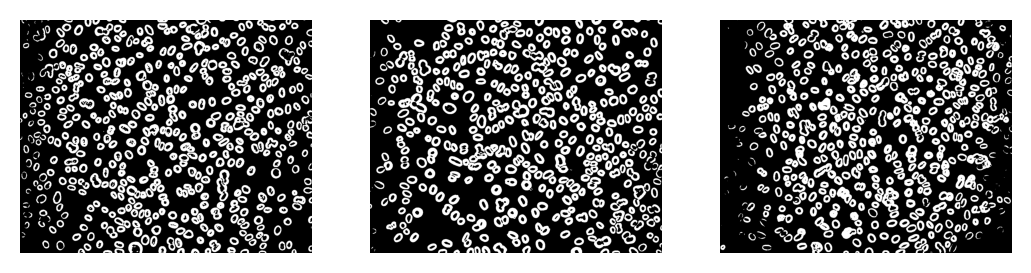

In [38]:
plt.figure(dpi=200)

plt.subplot(1,3,1)
plt.imshow(thresholded_1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(thresholded_2, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(thresholded_3, cmap='gray')
plt.axis('off')
